In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    "The slope of the regression line (original units)"
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    "The intercept of the regression line (original units)"
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

## Errors

In [3]:
little_women = Table.read_table('little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


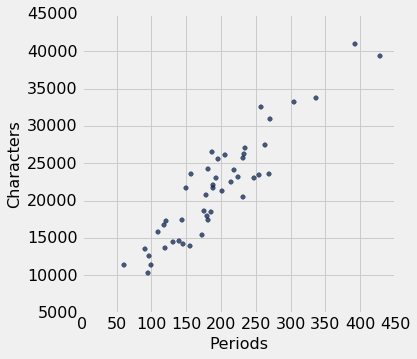

In [4]:
little_women.scatter('Periods', 'Characters')

In [5]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

In [71]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(a, b):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plt.plot(xlims, a * xlims + b, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, a * x + b], color='r', lw=2)

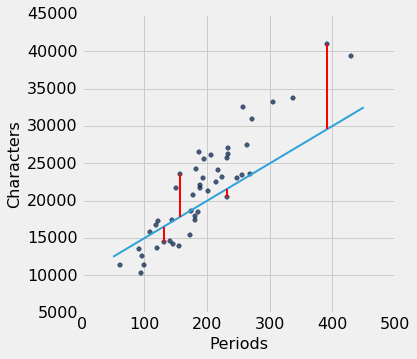

In [72]:
lw_errors(50, 10000)

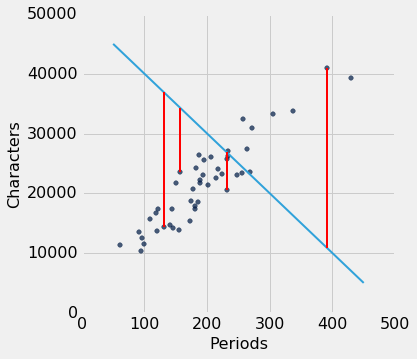

In [74]:
lw_errors(-100, 50000)

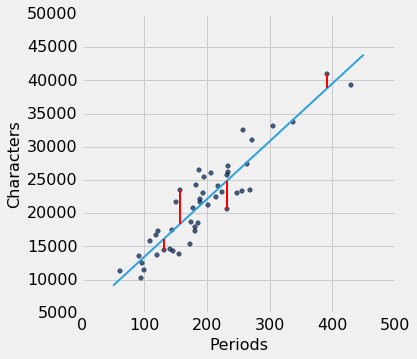

In [75]:
a = slope(little_women, 'Periods', 'Characters')
b = intercept(little_women, 'Periods', 'Characters')
lw_errors(a, b)

In [102]:
def lw_mse(a, b):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = a * x + b
    return np.average((y - estimate) ** 2)

7019.1759340480321

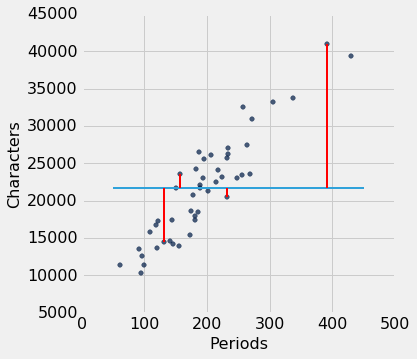

In [103]:
char = little_women.column('Characters')
char_avg = np.average(char)
lw_errors(0, char_avg)
lw_mse(0, char_avg) ** 0.5

In [104]:
np.std(char)

7019.1759340480321

In [105]:
np.average((char - np.average(char)) ** 2) ** 0.5

7019.1759340480321

2701.690785311856

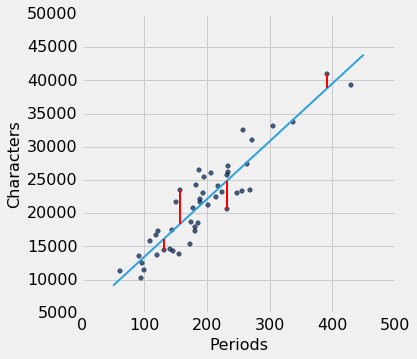

In [106]:
lw_errors(a, b)
lw_mse(a, b) ** 0.5

## Numerical optimization

In [13]:
def double(x):
    return 2 * x

def triple(x):
    return 3 * x

[double(4), triple(4), double(5), triple(5)]

[8, 12, 10, 15]

In [14]:
def multiply(a, x):
    return a * x

[multiply(2, 4), multiply(3, 4), multiply(2, 5), multiply(3, 5)]

[8, 12, 10, 15]

In [112]:
def scale_by(a):
    def scale(x):
        return a * x
    return scale

double = scale_by(2)
triple = scale_by(3)
        
[double(4), triple(4), double(5), triple(5)]

[8, 12, 10, 15]

In [113]:
decimate = scale_by(1/10)
little_women.apply(decimate, 'Periods')

array([ 18.9,  18.8,  23.1,  19.5,  25.5,  14. ,
        13.1,  21.4,  33.7,  18.5,  19.3,  42.9,
        17.5,  18. ,  18.1,  17.2,  15.5,  14.4,
        12.1,  14.5,  26.9,  12. ,  24.7,  18.2,
         9.1,  15. ,  10.9,  27.1,  23.3,  21.8,
        17.8,  22.4,  23.2,  25.7,  20.1,  10. ,
        15.7,  20.6,  26.3,   6.1,  18.7,  11.8,
        30.5,   9.5,   9.6,  23.4,  39.2])

In [16]:
def mean_squared_error(table, x, y):
    def for_line(a, b):
        estimate = (a * table.column(x) + b)
        return np.average((table.column(y) - estimate) ** 2)
    return for_line

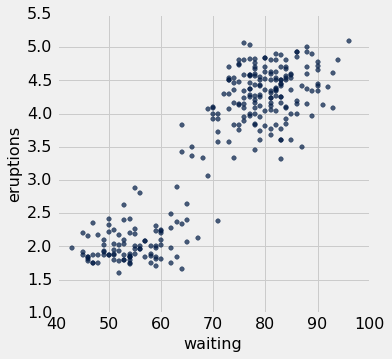

In [17]:
faithful = Table.read_table('faithful.csv')
faithful.scatter(1, 0)

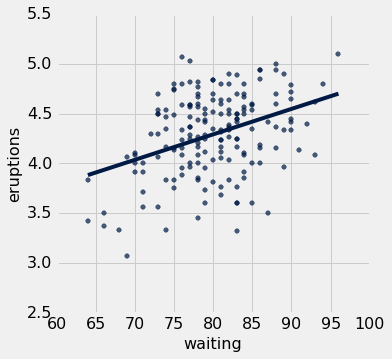

In [18]:
long = faithful.where(faithful.column('eruptions') > 3)
long.scatter(1, 0, fit_line=True)

In [19]:
mse_long = mean_squared_error(long, 1, 0)

In [20]:
mse_long(0, 4) ** 0.5

0.50268461001194098

In [22]:
a, b = minimize(mse_long)

In [23]:
mse_long(a, b) ** 0.5

0.38014612988504093

In [24]:
print("slope:   ", slope(long, 1, 0))
print("a:       ", a)
print("intecept:", intercept(long, 1, 0))
print("b:       ", b)

slope:    0.0255508940715
a:        0.0255496
intecept: 2.24752334164
b:        2.247629


## Residuals

0.37278222557075108

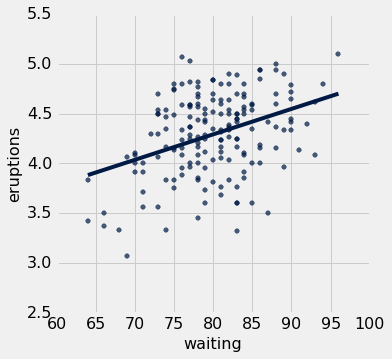

In [25]:
long.scatter(1, 0, fit_line=True)
correlation(long, 1, 0)

In [26]:
def residual_plot(table, x, y):
    fitted = fit(table, x, y)
    residuals = table.column(y) - fitted
    res_table = Table().with_columns([
            'fitted', fitted, 
            'residuals', residuals])
    res_table.scatter(0, 1, fit_line=True)

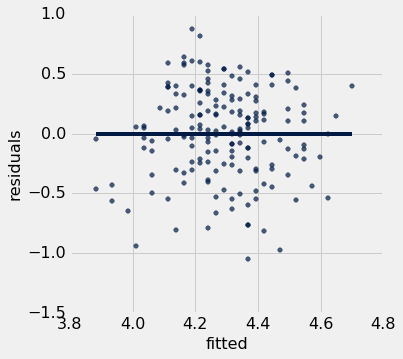

In [27]:
residual_plot(long, 1, 0)

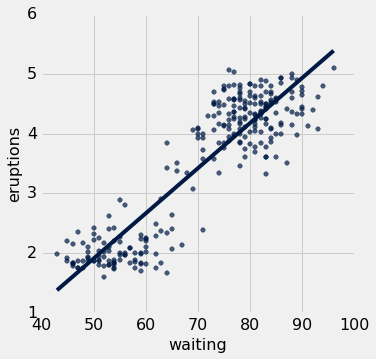

In [28]:
faithful.scatter(1, 0, fit_line=True)

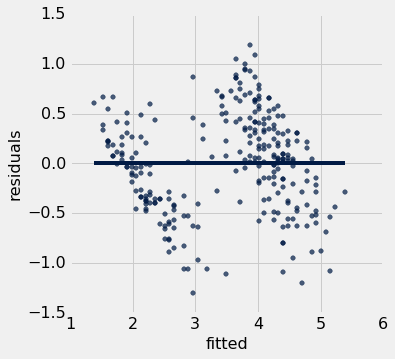

In [29]:
residual_plot(faithful, 1, 0)

## Multiple Regression

In [30]:
grades = Table.read_table('grades_and_piazza.csv')
grades

GPA,days online,views,contributions,questions,notes,answers
2.863,29,299,5,1,1,0
3.505,57,299,0,0,0,0
3.029,27,101,1,1,0,0
3.679,67,301,1,0,0,0
3.474,43,201,12,1,0,0
3.705,67,308,45,22,0,5
3.806,36,171,20,4,3,4
3.667,82,300,26,11,0,3
3.245,44,127,6,1,1,0
3.293,35,259,16,13,1,0


In [31]:
grades.to_df().corr()

,GPA,days online,views,contributions,questions,notes,answers
GPA,1.000000,0.684905,0.444175,0.427897,0.409212,-0.160604,0.440382
days online,0.684905,1.000000,0.654557,0.448319,0.435269,-0.230839,0.502810
views,0.444175,0.654557,1.000000,0.426406,0.361002,0.065627,0.365010
contributions,0.427897,0.448319,0.426406,1.000000,0.857981,0.295661,0.702679
questions,0.409212,0.435269,0.361002,0.857981,1.000000,-0.006365,0.515661
notes,-0.160604,-0.230839,0.065627,0.295661,-0.006365,1.000000,0.229599
answers,0.440382,0.502810,0.365010,0.702679,0.515661,0.229599,1.000000


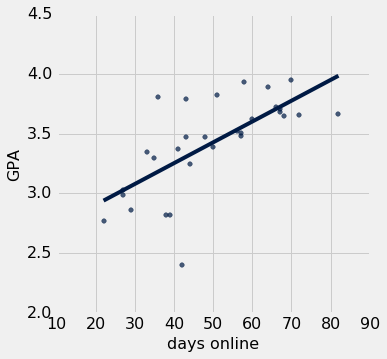

In [32]:
grades.scatter('days online', 'GPA', fit_line=True)

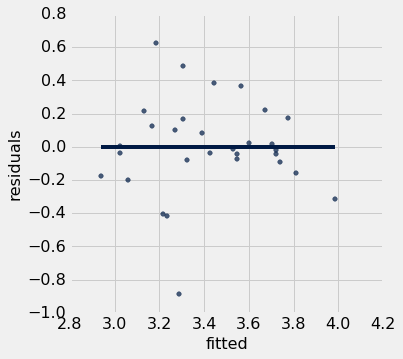

In [33]:
residual_plot(grades, 'days online', 'GPA')

In [34]:
grades_days_mse = mean_squared_error(grades, 'days online', 'GPA')
a, b = minimize(grades_days_mse)
grades_days_mse(a, b) ** 0.5

0.28494512878662448

In [57]:
grades_cont_mse = mean_squared_error(grades, 'contributions', 'GPA')
a, b = minimize(grades_cont_mse)
grades_cont_mse(a, b) ** 0.5

0.3534582912632484

In [59]:
def fit_both(a_days, a_cont, b):
    days = grades.column('days online')
    cont = grades.column('contributions')
    return a_days * days + a_cont * cont + b

def grades_both_mse(a_days, a_cont, b):
    fitted = fit_both(a_days, a_cont, b)
    y = grades.column('GPA')
    return np.average((y - fitted) ** 2)

minimize(grades_both_mse)

array([ 0.0156871,  0.0054008,  2.5725924])

In [54]:
0.0156871 * 50 + 0.0054008 * 5 + 2.5725924

3.3839514

In [60]:
a_days, a_contributions, b = minimize(grades_both_mse)
grades_both_mse(a_days, a_contributions, b) ** 0.5

0.2799976765803352

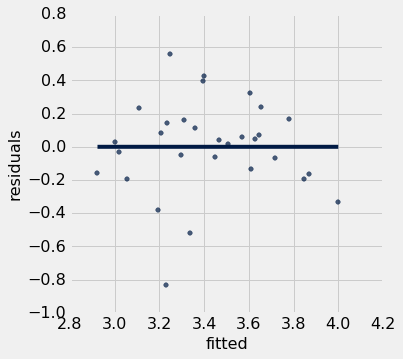

In [61]:
fitted = fit_both(a_days, a_contributions, b)
residuals = grades.column('GPA') - fitted
Table().with_columns([
        'fitted', fitted, 
        'residuals', residuals
    ]).scatter(0, 1, fit_line=True)